# Statistics review 1: Presenting and summarising data

R code to accompany [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC137399/pdf/cc1455.pdf)

## Key learning points

- The first step in any analysis is to describe and summarize the data
- Understand the following
    - qualitative data (unordered and ordered) and quantitative data (discrete and continuous)
    - how these types of data can be represented figuratively
    - the two important features of a quantitative dataset (location and variability)
    - the measures of location (mean, median and mode)
    - the measures of variability (range, interquartile range, standard deviation and variance) 
    - common distributions of clinical data
    - simple transformations of positively skewed data.

In [1]:
suppressPackageStartupMessages(library(tidyverse))

#### Set default plot size to 4" by 3"

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Summary Statistics

### Read in data set from file

In [3]:
df1 <- read.csv('data/haemoglobin.csv', header=FALSE, col.names=c("hb"))

#### Working with data frames

In [4]:
class(df1)

[1] "data.frame"

In [5]:
head(df1)

hb
5.4
8.2
6.4
8.3
6.4
8.3


In [6]:
str(df1)

'data.frame':	48 obs. of  1 variable:
 $ hb: num  5.4 8.2 6.4 8.3 6.4 8.3 7 8.6 7.1 8.8 ...


In [7]:
dim(df1)

[1] 48  1

In [8]:
summary(df1)

       hb        
 Min.   : 5.400  
 1st Qu.: 8.750  
 Median : 9.800  
 Mean   : 9.869  
 3rd Qu.:10.800  
 Max.   :14.100  

#### Dataframe indexing

In [9]:
df1$hb

[1]  5.4  8.2  6.4  8.3  6.4  8.3  7.0  8.6  7.1  8.8  7.3  8.9  7.7  9.1  8.1
[16]  9.3  9.3  9.9  9.4  9.9  9.4  9.9  9.4 10.1  9.4 10.3  9.5 10.3  9.7 10.4
[31]  9.7 10.4 10.5 11.9 10.5 12.3 10.6 12.6 10.8 12.7 10.8 13.0 11.3 13.3 11.7
[46] 14.0 11.7 14.1

In [10]:
df1[,1]

[1]  5.4  8.2  6.4  8.3  6.4  8.3  7.0  8.6  7.1  8.8  7.3  8.9  7.7  9.1  8.1
[16]  9.3  9.3  9.9  9.4  9.9  9.4  9.9  9.4 10.1  9.4 10.3  9.5 10.3  9.7 10.4
[31]  9.7 10.4 10.5 11.9 10.5 12.3 10.6 12.6 10.8 12.7 10.8 13.0 11.3 13.3 11.7
[46] 14.0 11.7 14.1

In [11]:
df1[1,]

[1] 5.4

In [12]:
df1[5:10,]

[1] 6.4 8.3 7.0 8.6 7.1 8.8

### Measuring location

#### Using a custom function

In [13]:
sr.mean <- function(x) {
    sum(x)/length(x)
}

In [14]:
sr.mean(df1$hb)

[1] 9.86875

#### Using built-in functions

In [15]:
df1 %>% summarize(mean=mean(hb), median=median(hb), mode=mode(hb))

mean,median,mode
9.86875,9.8,numeric


#### Visualizing the data distribution

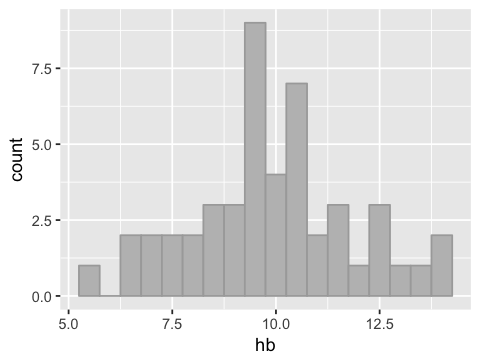

In [16]:
ggplot(df1, aes(x=hb)) +
geom_histogram(binwidth=0.5, fill="grey", color="darkgrey")

### Measuring variability

In [17]:
range(df1$hb)

[1]  5.4 14.1

In [18]:
quantile(df1$hb, c(0.25, 0.75))

25%   75% 
 8.75 10.80

In [19]:
sd(df1$hb)

[1] 1.972918

In [20]:
var(df1$hb)

[1] 3.892407

In [21]:
df1 %>% summarize(min=min(hb), 
                 max=max(hb), 
                 iqr=quantile(hb, 0.75)- quantile(hb, 0.25), 
                 sd=sd(hb),
                 var=var(hb))

min,max,iqr,sd,var
5.4,14.1,2.05,1.972918,3.892407


### Using a convenience function

In [22]:
summary(df1)

       hb        
 Min.   : 5.400  
 1st Qu.: 8.750  
 Median : 9.800  
 Mean   : 9.869  
 3rd Qu.:10.800  
 Max.   :14.100  

## Common distributions and simple transformations

**Exercise**. Read in the `urea.csv` data file into a data frame `df2` and name the column `urea`.

In [23]:
df2 <- read.csv("data/urea.csv", header=FALSE, col.names=c("urea"))

In [24]:
head(df2, n=3)

urea
16.007049
13.647212
6.653046


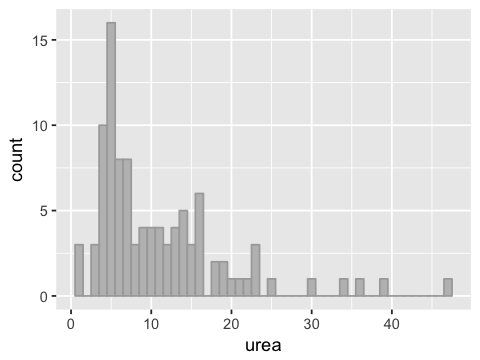

In [25]:
g <- ggplot(df2, aes(x=urea)) 
g <- g + geom_histogram(binwidth=1, fill="grey", color="darkgrey")
g

#### Skewness

We say the data has a positive or right skew. This name comes from the fact that there is a statistical measure called skewness that is positive for long right tails, and negative for long left tails.

In [26]:
install.packages("e1071", repos = "http://cran.r-project.org")
library(e1071)


The downloaded binary packages are in
	/var/folders/3l/tbmzdkss71152d8t9n1f8nx40000gn/T//RtmpdeIh9P/downloaded_packages


In [27]:
skewness(df2$urea)

[1] 1.801791

#### Log transform of the data

In [28]:
df2['trans'] = log(df2['urea'])

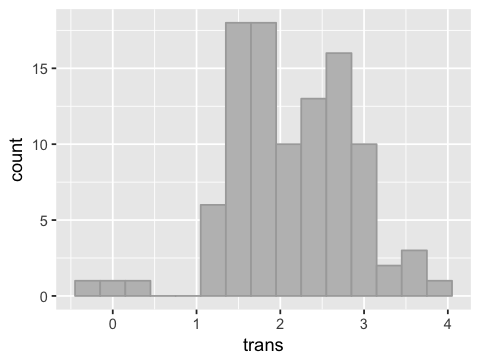

In [29]:
g <- ggplot(df2, aes(x=trans)) 
g <- g + geom_histogram(binwidth=0.3, fill="grey", color="darkgrey")
g

In [30]:
head(df2)

urea,trans
16.007049,2.773029
13.647212,2.613535
6.653046,1.895075
5.107674,1.630744
19.325193,2.961410
10.141074,2.316594


#### Finding geometric mean

In [31]:
gm  <- function(x) {
    return(exp(mean(log(x))))
}

In [32]:
df2 %>% summarise(mean=mean(urea), geom.mean=gm(urea))

mean,geom.mean
10.97242,8.504802


###  Exercise

**1** Load the file "ph.csv" into a data frame called `df`. Label the column `ph`.

**2**. Plot a histogram of the data. Calculate the skewness of the `ph` column.

**3** Left skewed data can sometimes be made more "normal" by an exponential transformation. That is, if the original data is $x$, the transformed data is $e^x$. Create another column named `trasn` with the transformed data.

**4**. Plot a histogram of the transformed data.

**5** Write your own function called `sr.sd` to calculate the standard deviation using the formula in Table 3.

**6**. Create a new table using the `summarise` function with the mean and standard deviation of both original and transformed data values. This data frame should have 1 row and 4 columns named `orig.mean`, `orig.sd`, `trans.mean`, `trans.sd`.